# OM4 simulation with ANN

In [48]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


In [49]:
path = '/home/db194/scratch_db194/OM4/test_ANN_20Nov/'
#path2 = '/home/db194/scratch_db194/OM4/test/'

In [50]:
os = xr.open_dataset(path + 'ocean.stats.nc', decode_times=False)
os['Time'] = os.Time - os.Time[0]
#os2 = xr.open_dataset(path2 + 'ocean.stats.nc', decode_times=False)
#os2['Time'] = os2.Time - os2.Time[0]

In [51]:
path_no_param = '/scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/'
os_no_param = xr.open_dataset(path_no_param + 'ocean.stats.nc', decode_times=False)
os_no_param['Time'] = os_no_param.Time - os_no_param.Time[0]
os_no_param = os_no_param.drop_duplicates(dim='Time', keep='first')


## Bulk Statistics 

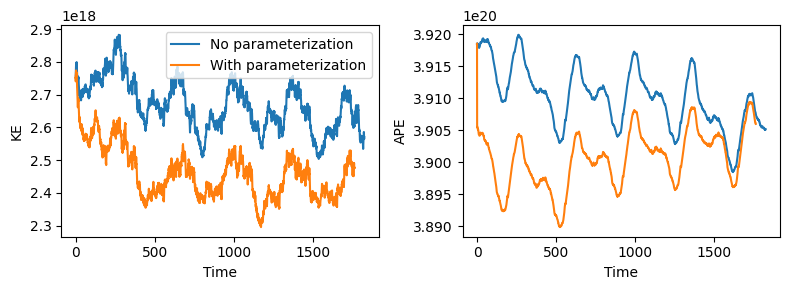

In [52]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
os_no_param.KE.sum('Layer').plot(label='No parameterization')
os.KE.sum('Layer').plot(label='With parameterization')
#os2.KE.sum('Layer').plot(label='With parameterization')
plt.legend()


plt.subplot(1,2,2)
os_no_param.APE.sum('Interface').plot()
os.APE.sum('Interface').plot()
#os2.APE.sum('Interface').plot()

plt.tight_layout()

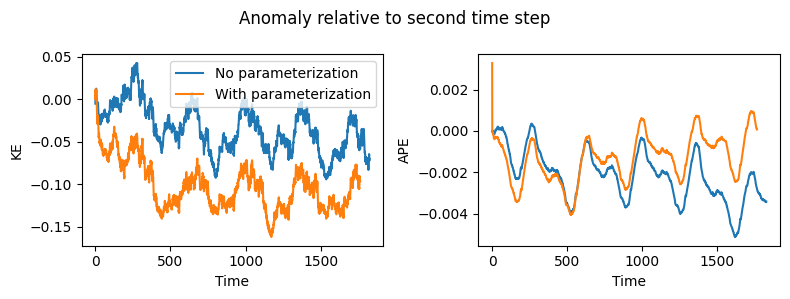

In [53]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
((os_no_param.KE.sum('Layer') - os_no_param.KE.sum('Layer')[1]) / os_no_param.KE.sum('Layer')[1]).plot(label='No parameterization')
((os.KE.sum('Layer') - os.KE.sum('Layer')[1]) / os.KE.sum('Layer')[1]).plot(label='With parameterization')
#((os2.KE.sum('Layer') - os2.KE.sum('Layer')[1]) / os2.KE.sum('Layer')[1]).plot(label='With parameterization')
plt.legend()



plt.subplot(1,2,2)
((os_no_param.APE.sum('Interface') - os_no_param.APE.sum('Interface')[1]) / os_no_param.APE.sum('Interface')[1]).plot()
((os.APE.sum('Interface') - os.APE.sum('Interface')[1]) / os.APE.sum('Interface')[1]).plot()
#((os2.APE.sum('Interface') - os2.APE.sum('Interface')[1]) / os2.APE.sum('Interface')[1]).plot()
plt.suptitle('Anomaly relative to second time step')

plt.tight_layout()

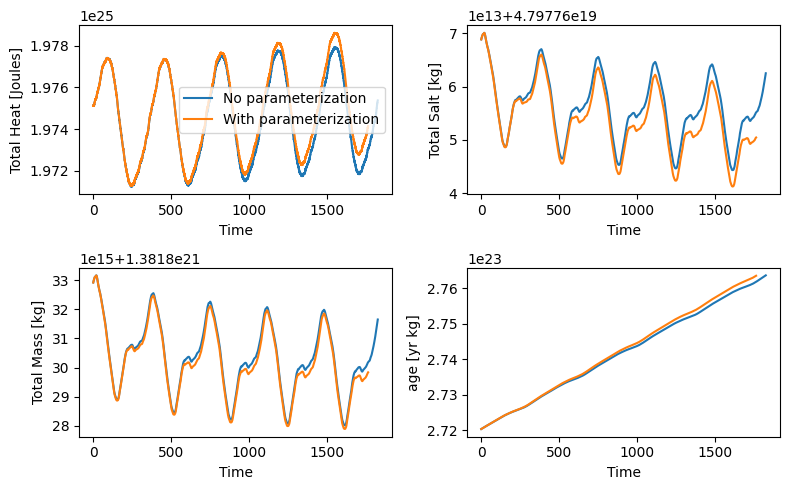

In [54]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
os_no_param.Heat.plot(label='No parameterization')
os.Heat.plot(label='With parameterization')
plt.legend()


plt.subplot(2,2,2)
os_no_param.Salt.plot()
os.Salt.plot()

plt.subplot(2,2,3)
os_no_param.Mass.plot()
os.Mass.plot()

plt.subplot(2,2,4)
os_no_param.age.plot()
os.age.plot()

plt.tight_layout()

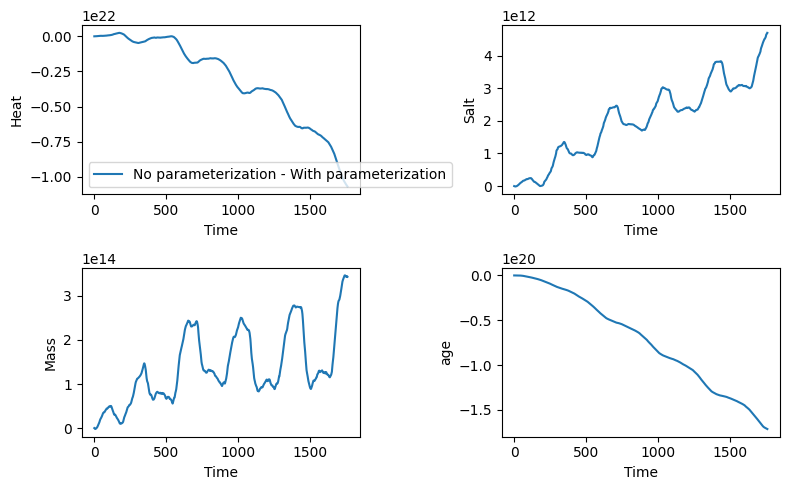

In [55]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
(os_no_param.Heat - os.Heat).plot(label='No parameterization - With parameterization')
plt.legend()

plt.subplot(2,2,2)
(os_no_param.Salt - os.Salt).plot(label='No parameterization - With parameterization')

plt.subplot(2,2,3)
(os_no_param.Mass - os.Mass).plot(label='No parameterization - With parameterization')

plt.subplot(2,2,4)
(os_no_param.age - os.age).plot(label='No parameterization - With parameterization')

plt.tight_layout()

## Simulated fields

In [9]:
ds_daily_1 = xr.open_dataset(path + '19770101.ocean_daily_00721240.nc')
ds_daily_2 = xr.open_dataset(path + '19770101.ocean_daily_00721605.nc')

In [22]:
def load_monthly_files(path, drop_last=1, pattern_month='*ocean_month_[0-9]*.nc',
                       pattern_month_z='*ocean_month_z_[0-9]*.nc', open_kwargs=None):
    """
    Collect, optionally drop last N monthly files, open them, and report.
    Parameters
    ----------
    path : str
        Directory containing MOM6 output.
    drop_last : int
        Number of files to drop from the tail of each list.
    pattern_month : str
        Glob pattern (joined to path) for 2D monthly files.
    pattern_month_z : str
        Glob pattern (joined to path) for z-level monthly files.
    open_kwargs : dict or None
        Extra kwargs passed to xr.open_dataset (e.g. {'decode_times': False}).
    Returns
    -------
    month_files : list[str]
    month_z_files : list[str]
    ds_months : list[xr.Dataset]
    dsz_months : list[xr.Dataset]
    """
    if open_kwargs is None:
        open_kwargs = {}
    month_files = sorted(glob.glob(path + pattern_month))
    month_z_files = sorted(glob.glob(path + pattern_month_z))

    if drop_last > 0:
        month_files = month_files[:-drop_last] if len(month_files) > drop_last else []
        month_z_files = month_z_files[:-drop_last] if len(month_z_files) > drop_last else []

    print(f"Found {len(month_files)} ocean_month files (after dropping {drop_last}):")
    for f in month_files:
        print(f"  {f}")
    print(f"\nFound {len(month_z_files)} ocean_month_z files (after dropping {drop_last}):")
    for f in month_z_files:
        print(f"  {f}")

    ds_months = [xr.open_dataset(f, **open_kwargs) for f in month_files]
    dsz_months = [xr.open_dataset(f, **open_kwargs) for f in month_z_files]

    print(f"\nLoaded {len(ds_months)} ocean_month datasets")
    print(f"Loaded {len(dsz_months)} ocean_month_z datasets")
    return month_files, month_z_files, ds_months, dsz_months



In [21]:
# Example (replicates previous behavior dropping 1):
month_files, month_z_files, ds_months, dsz_months = load_monthly_files(path, drop_last=1)

Found 4 ocean_month files (after dropping 1):
  /home/db194/scratch_db194/OM4/test_ANN_20Nov/19770101.ocean_month_00721255.nc
  /home/db194/scratch_db194/OM4/test_ANN_20Nov/19770101.ocean_month_00721620.nc
  /home/db194/scratch_db194/OM4/test_ANN_20Nov/19770101.ocean_month_00721985.nc
  /home/db194/scratch_db194/OM4/test_ANN_20Nov/19770101.ocean_month_00722350.nc

Found 4 ocean_month_z files (after dropping 1):
  /home/db194/scratch_db194/OM4/test_ANN_20Nov/19770101.ocean_month_z_00721255.nc
  /home/db194/scratch_db194/OM4/test_ANN_20Nov/19770101.ocean_month_z_00721620.nc
  /home/db194/scratch_db194/OM4/test_ANN_20Nov/19770101.ocean_month_z_00721985.nc
  /home/db194/scratch_db194/OM4/test_ANN_20Nov/19770101.ocean_month_z_00722350.nc

Loaded 4 ocean_month datasets
Loaded 4 ocean_month_z datasets


In [23]:
_, _, ds_months_noparam, dsz_months_noparam = load_monthly_files(path_no_param, drop_last=1)

Found 4 ocean_month files (after dropping 1):
  /scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/19770101.ocean_month_00721255.nc
  /scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/19780101.ocean_month_00721620.nc
  /scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/19790101.ocean_month_00721985.nc
  /scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/19800101.ocean_month_00722350.nc

Found 4 ocean_month_z files (after dropping 1):
  /scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/19770101.ocean_month_z_00721255.nc
  /scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/19780101.ocean_month_z_00721620.nc
  /scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/19790101.ocean_month_z_00721985.nc
  /scratch/pp2681/mom6/OM4_SIS2/unparameterized/output/19800101.ocean_month_z_00722350.nc

Loaded 4 ocean_month datasets
Loaded 4 ocean_month_z datasets


In [24]:
ds_grid = xr.open_dataset(path + 'ocean_geometry.nc').rename({'lonh': 'xh', 'lath': 'yh', 'lonq': 'xq', 'latq': 'yq'})
ds_grid

<xarray.Dataset> Size: 236MB
Dimensions:  (yh: 1080, xh: 1440, yq: 1080, xq: 1440)
Coordinates:
  * yh       (yh) float64 9kB -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * xh       (xh) float64 12kB -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yq       (yq) float64 9kB -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
  * xq       (xq) float64 12kB -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
Data variables: (12/19)
    geolatb  (yq, xq) float64 12MB ...
    geolonb  (yq, xq) float64 12MB ...
    geolat   (yh, xh) float64 12MB ...
    geolon   (yh, xh) float64 12MB ...
    D        (yh, xh) float64 12MB ...
    f        (yq, xq) float64 12MB ...
    ...       ...
    dyBu     (yq, xq) float64 12MB ...
    Ah       (yh, xh) float64 12MB ...
    Aq       (yq, xq) float64 12MB ...
    dxCvo    (yq, xh) float64 12MB ...
    dyCuo    (yh, xq) float64 12MB ...
    wet      (yh, xh) float64 12MB ...
Attributes:
    filename:  ./ocean_geometry.nc

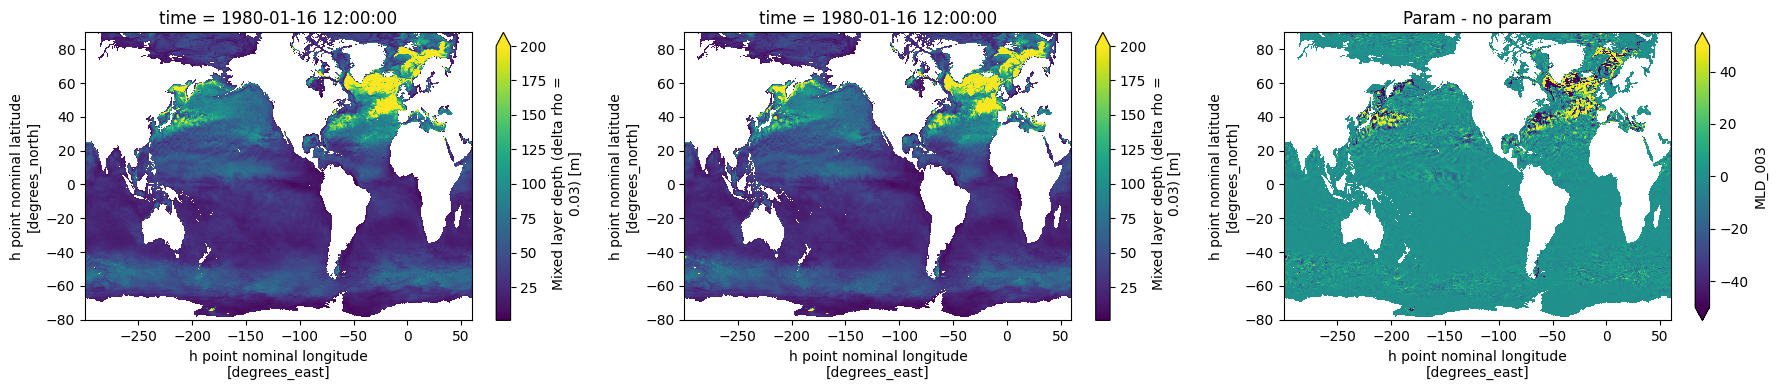

In [26]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
ds_months[-1].MLD_003.isel(time=0).plot(vmax=200)

plt.subplot(1,3,2)
ds_months_noparam[-1].MLD_003.isel(time=0).plot(vmax=200)

plt.subplot(1,3,3)
(ds_months[-1].MLD_003.isel(time=0) - ds_months_noparam[-1].MLD_003.isel(time=0)).plot(vmax=50, vmin=-50)
plt.title('Param - no param')

plt.tight_layout()

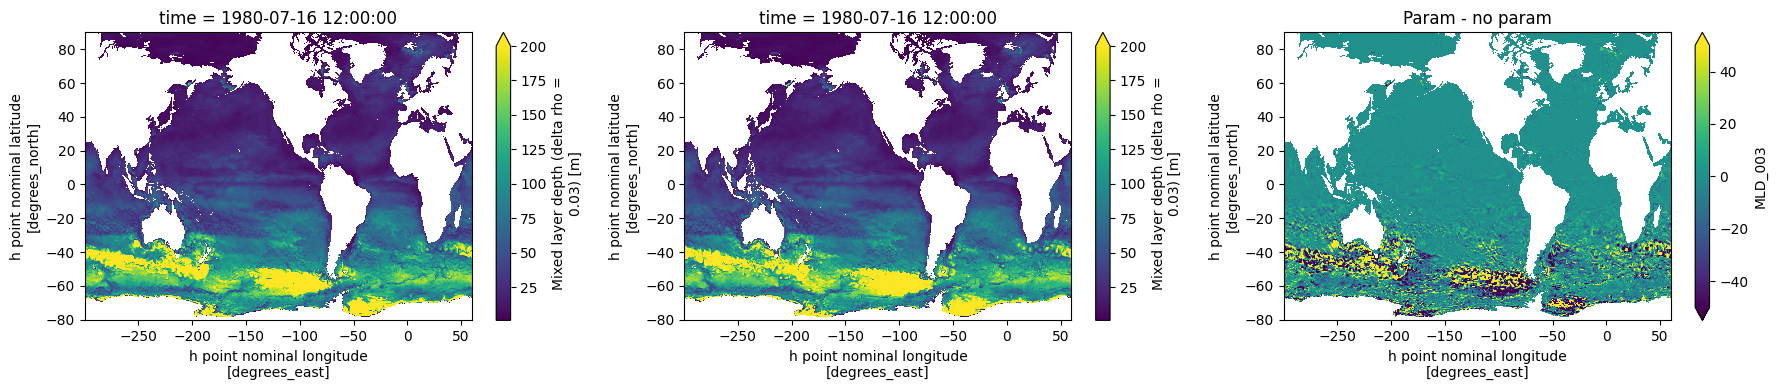

In [27]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
ds_months[-1].MLD_003.isel(time=6).plot(vmax=200)

plt.subplot(1,3,2)
ds_months_noparam[-1].MLD_003.isel(time=6).plot(vmax=200)

plt.subplot(1,3,3)
(ds_months[-1].MLD_003.isel(time=6) - ds_months_noparam[-1].MLD_003.isel(time=6)).plot(vmax=50, vmin=-50)
plt.title('Param - no param')

plt.tight_layout()

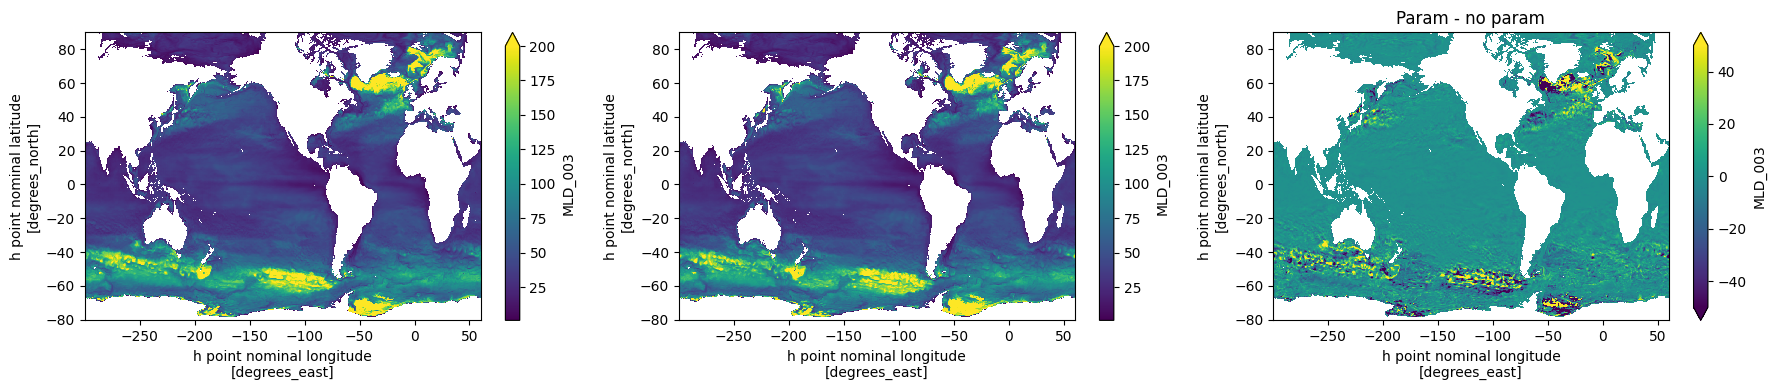

In [28]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
ds_months[-1].MLD_003.mean('time').plot(vmax=200)

plt.subplot(1,3,2)
ds_months_noparam[-1].MLD_003.mean('time').plot(vmax=200)

plt.subplot(1,3,3)
(ds_months[-1].MLD_003.mean('time') - ds_months_noparam[-1].MLD_003.mean('time')).plot(vmax=50, vmin=-50)
plt.title('Param - no param')

plt.tight_layout()

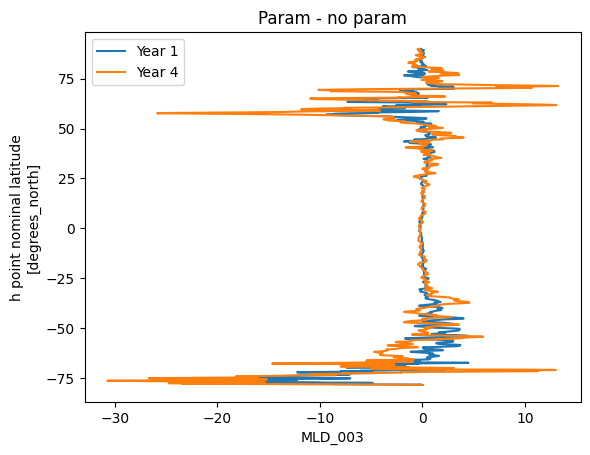

In [33]:
(ds_months[0].MLD_003.mean('time') - ds_months_noparam[0].MLD_003.mean('time')).mean('xh').plot(label='Year 1', y ='yh')
(ds_months[-1].MLD_003.mean('time') - ds_months_noparam[-1].MLD_003.mean('time')).mean('xh').plot(label='Year 4', y ='yh')
plt.title('Param - no param')
plt.legend()

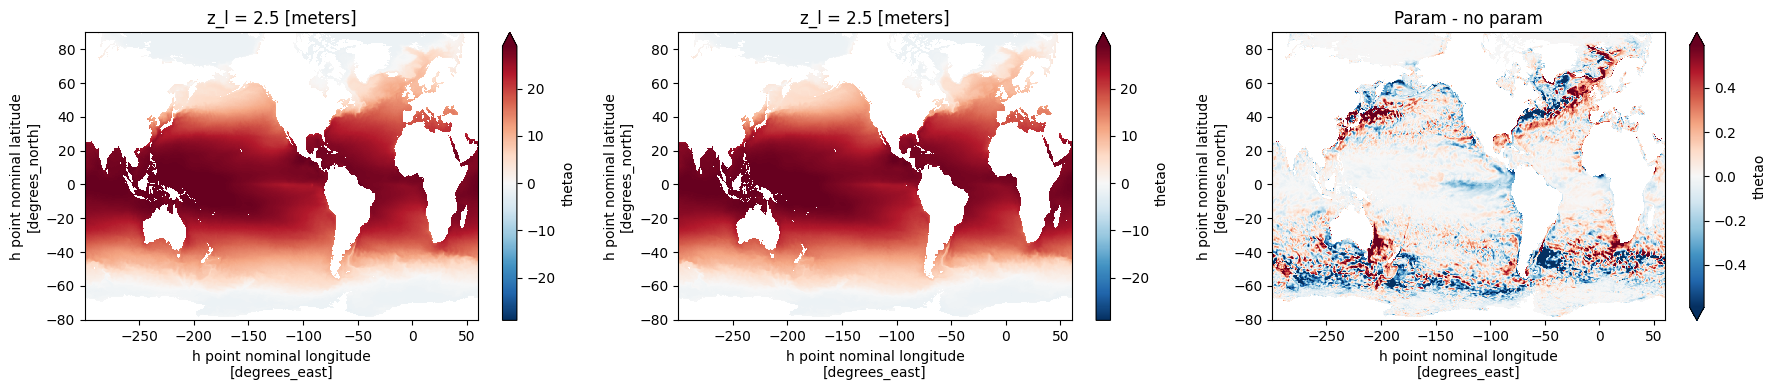

In [43]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
dsz_months[-1].thetao.isel(z_l=0).mean('time').plot(robust=True)

plt.subplot(1,3,2)
dsz_months_noparam[-1].thetao.isel(z_l=0).mean('time').plot(robust=True)

plt.subplot(1,3,3)
(dsz_months[-1].thetao.isel(z_l=0).mean('time') - dsz_months_noparam[-1].thetao.isel(z_l=0).mean('time')).plot(robust=True)
plt.title('Param - no param')

plt.tight_layout()

In [45]:
np.linspace(-2.25,2.25,10)

array([-2.25, -1.75, -1.25, -0.75, -0.25,  0.25,  0.75,  1.25,  1.75,
        2.25])

Text(0.5, 1.0, 'Param - no param')

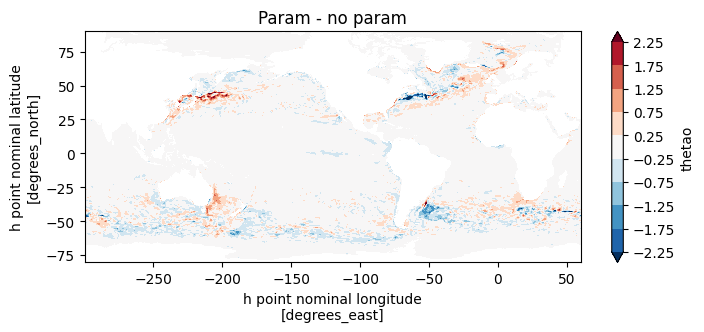

In [46]:
plt.figure(figsize  =(8,3))
(dsz_months[-1].thetao.isel(z_l=0).mean('time') - dsz_months_noparam[-1].thetao.isel(z_l=0).mean('time')).plot(levels=np.linspace(-2.25,2.25,10))
plt.title('Param - no param')

Text(0.5, 1.0, 'Param - no param')

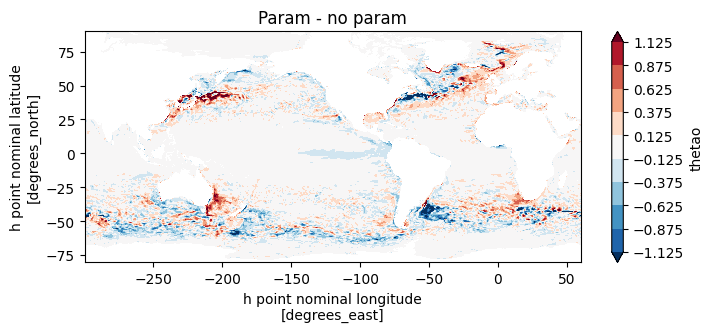

In [47]:
plt.figure(figsize  =(8,3))
(dsz_months[-1].thetao.isel(z_l=0).mean('time') - dsz_months_noparam[-1].thetao.isel(z_l=0).mean('time')).plot(levels=np.linspace(-2.25/2,2.25/2,10))
plt.title('Param - no param')

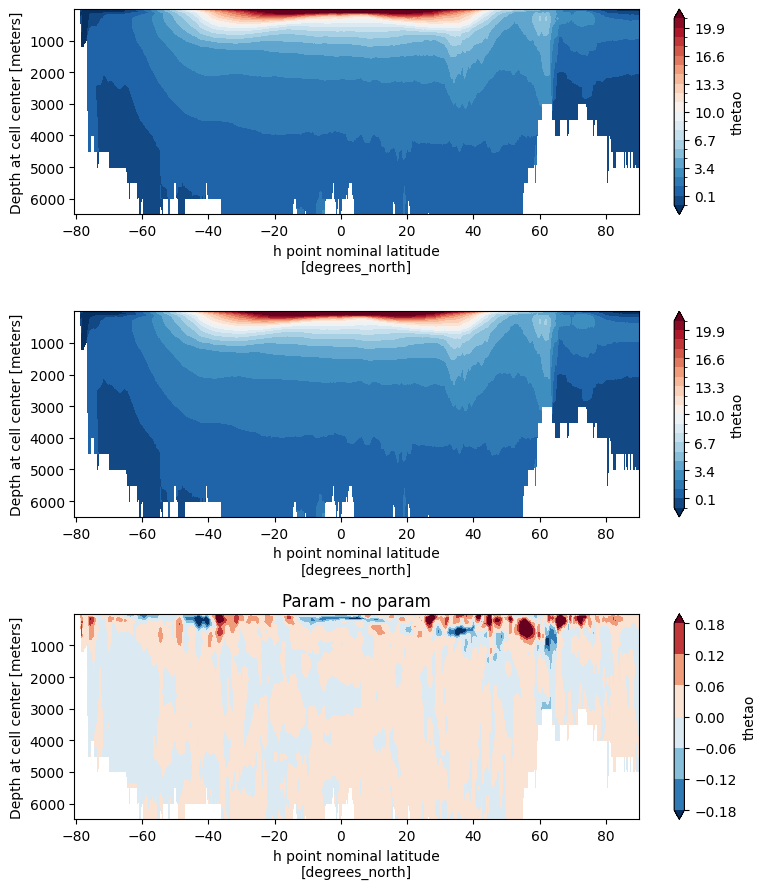

In [42]:
plt.figure(figsize=(8,9))

plt.subplot(3,1,1)
dsz_months[-1].thetao.mean(['time','xh']).plot.contourf(vmin=-1, vmax=21, levels=21, cmap='RdBu_r')
plt.gca().invert_yaxis()

plt.subplot(3,1,2)
dsz_months_noparam[-1].thetao.mean(['time','xh']).plot.contourf(vmin=-1, vmax=21, levels=21, cmap='RdBu_r')
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
(dsz_months[-1].thetao.mean(['time','xh']) - dsz_months_noparam[-1].thetao.mean(['time','xh'])).plot.contourf(robust=True)
plt.gca().invert_yaxis()
plt.title('Param - no param')

plt.tight_layout()

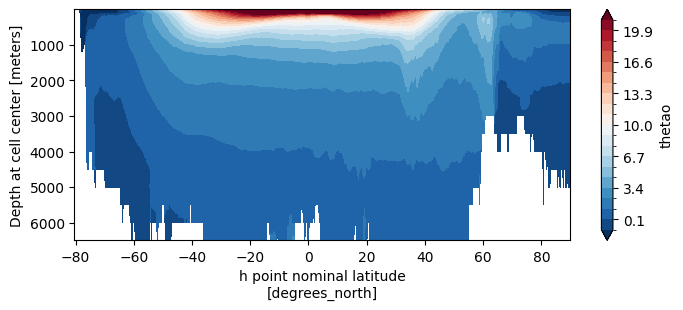

In [40]:
plt.figure(figsize=(8,3))

dsz_months_noparam[-1].thetao.mean(['time','xh']).plot.contourf(vmin=-1, vmax=21, levels=21, cmap='RdBu_r')
plt.gca().invert_yaxis()

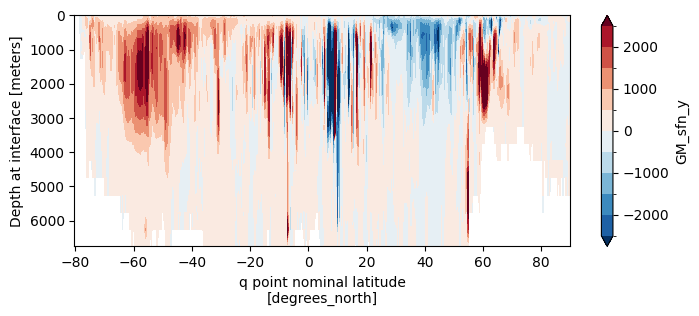

In [18]:
plt.figure(figsize=(8,3))

dsz_months[-1].GM_sfn_y.mean(['time','xh']).plot.contourf(vmin=-2500, levels=11)
plt.gca().invert_yaxis()

In [ ]:
plt.figure(figsize=(8,3))

dsz_months[-1].GM_sfn_y.mean(['time','xh']).plot.contourf(vmin=-2500, levels=11)
plt.gca().invert_yaxis()

In [13]:
#def add_ups(ds):

ups_y = dsz_month_1.GM_sfn_unlim_y/ds_grid.dyCv

In [14]:
from xgcm import Grid

In [15]:
grid = Grid(dsz_month_1, coords={'X': {'center': 'xh', 'right': 'xq'},
                            'Y': {'center': 'yh', 'right': 'yq'},
                            'Z': {'center': 'z_l', 'outer': 'z_i'} }, periodic=['X'])

In [16]:
vstar = grid.diff(ups_y, 'Z', boundary='extend') / grid.diff(dsz_month_1.z_i, 'Z', boundary='extend')

/ext3/miniconda3/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


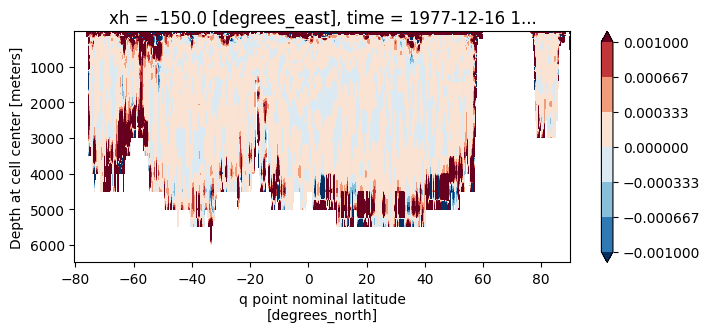

In [19]:
plt.figure(figsize=(8,3))

vstar.isel(time=-1).sel(xh=-150, method='nearest').plot.contourf(vmin=-1e-3)
plt.gca().invert_yaxis()

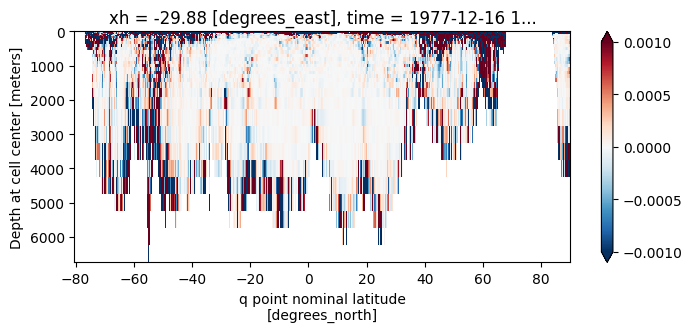

In [21]:
plt.figure(figsize=(8,3))

vstar.isel(time=-1).sel(xh=-30, method='nearest').plot(vmin=-1e-3)
plt.gca().invert_yaxis()

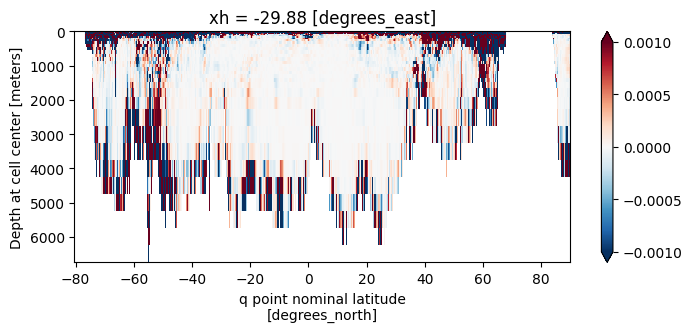

In [22]:
plt.figure(figsize=(8,3))

vstar.mean('time').sel(xh=-30, method='nearest').plot(vmin=-1e-3)
plt.gca().invert_yaxis()

In [ ]:
plt.figure(figsize=(8,3))

vstar.mean('time').sel(xh=-30, method='nearest').plot(vmin=-1e-3)
plt.gca().invert_yaxis()

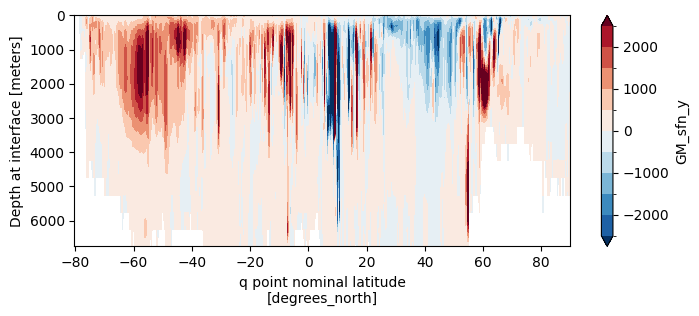

In [27]:
plt.figure(figsize=(8,3))

dsz_month_2.GM_sfn_y.mean(['time','xh']).plot.contourf(vmin=-2500, levels=11)
plt.gca().invert_yaxis()

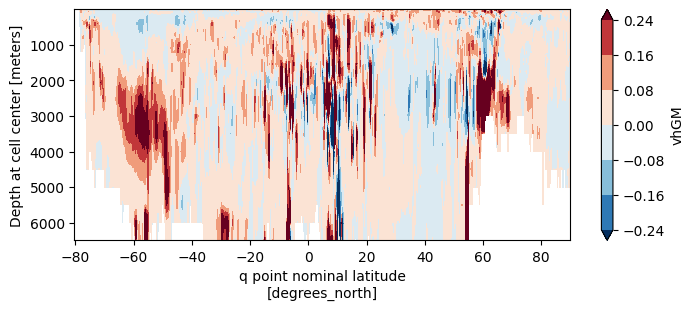

In [28]:
plt.figure(figsize=(8,3))

(dsz_month_1.vhGM.mean(['time','xh'])/25e3/100).plot.contourf(robust=True)
plt.gca().invert_yaxis()

In [30]:
ds_month_1

<xarray.Dataset> Size: 75MB
Dimensions:     (xh: 1440, yh: 1080, time: 12, nv: 2)
Coordinates:
  * xh          (xh) float64 12kB -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
  * yh          (yh) float64 9kB -80.39 -80.31 -80.23 ... 89.73 89.84 89.95
  * time        (time) object 96B 1977-01-16 12:00:00 ... 1977-12-16 12:00:00
  * nv          (nv) float64 16B 1.0 2.0
Data variables:
    MLD_003     (time, yh, xh) float32 75MB ...
    average_T1  (time) datetime64[ns] 96B ...
    average_T2  (time) datetime64[ns] 96B ...
    average_DT  (time) timedelta64[ns] 96B ...
    time_bnds   (time, nv) timedelta64[ns] 192B ...
Attributes:
    filename:   19770101.ocean_month_00721255.nc
    title:      OM4_SIS2_cgrid_025
    grid_type:  regular
    grid_tile:  N/A

In [31]:
dsz_month_1

<xarray.Dataset> Size: 32GB
Dimensions:         (xh: 1440, yh: 1080, z_l: 35, z_i: 36, time: 12, nv: 2,
                     xq: 1440, yq: 1080)
Coordinates:
  * xh              (xh) float64 12kB -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
  * yh              (yh) float64 9kB -80.39 -80.31 -80.23 ... 89.73 89.84 89.95
  * z_l             (z_l) float64 280B 2.5 10.0 20.0 ... 5.5e+03 6e+03 6.5e+03
  * z_i             (z_i) float64 288B 0.0 5.0 15.0 ... 6.25e+03 6.75e+03
  * time            (time) object 96B 1977-01-16 12:00:00 ... 1977-12-16 12:0...
  * nv              (nv) float64 16B 1.0 2.0
  * xq              (xq) float64 12kB -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yq              (yq) float64 9kB -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
Data variables: (12/16)
    so              (time, z_l, yh, xh) float32 3GB ...
    uo              (time, z_l, yh, xq) float32 3GB ...
    vo              (time, z_l, yq, xh) float32 3GB ...
    thetao          (time, z_l, yh, xh) float32 3GB ...
    vmo             (time, z_l, yq, xh) float32 3GB ...
    umo             (time, z_l, yh, xq) float32 3GB ...
    ...              ...
    uhGM            (time, z_l, yh, xq) float32 3GB ...
    vhGM            (time, z_l, yq, xh) float32 3GB nan nan nan ... nan nan nan
    average_T1      (time) datetime64[ns] 96B ...
    average_T2      (time) datetime64[ns] 96B ...
    average_DT      (time) timedelta64[ns] 96B ...
    time_bnds       (time, nv) timedelta64[ns] 192B ...
Attributes:
    filename:   19770101.ocean_month_z_00721255.nc
    title:      OM4_SIS2_cgrid_025
    grid_type:  regular
    grid_tile:  N/A

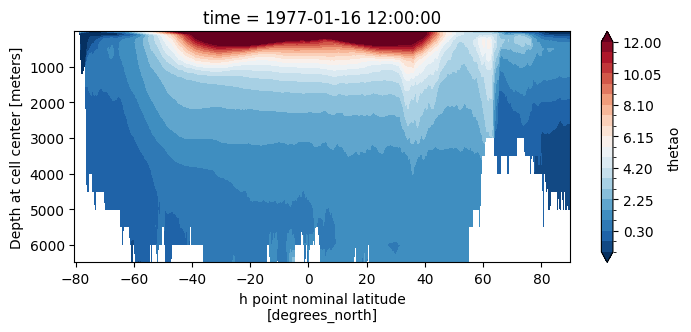

In [5]:
plt.figure(figsize=(8,3))

(dsz_month_1.thetao.mean(['xh'])).isel(time=0).plot.contourf(levels=np.linspace(-1, 12,21))
plt.gca().invert_yaxis()

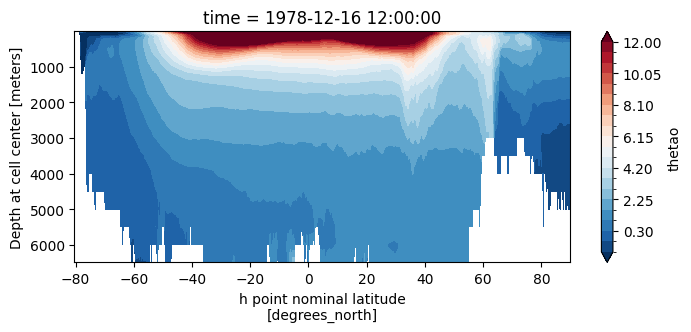

In [6]:
plt.figure(figsize=(8,3))

(dsz_month_2.thetao.mean(['xh'])).isel(time=-1).plot.contourf(levels=np.linspace(-1, 12,21))
plt.gca().invert_yaxis()

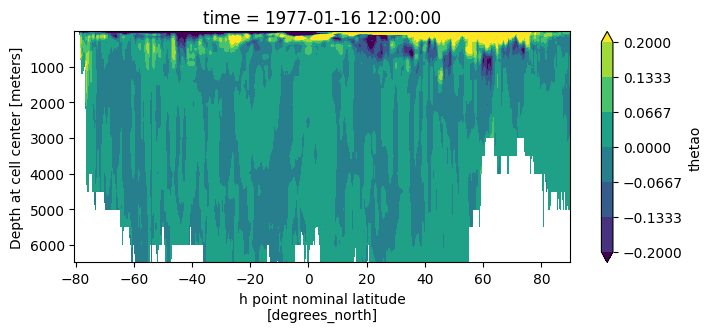

In [9]:
plt.figure(figsize=(8,3))

((dsz_month_2.thetao.mean(['xh'])).isel(time=-1) - (dsz_month_1.thetao.mean(['xh'])) ).isel(time=0).plot.contourf(vmin=-0.2, vmax=0.2)
plt.gca().invert_yaxis()

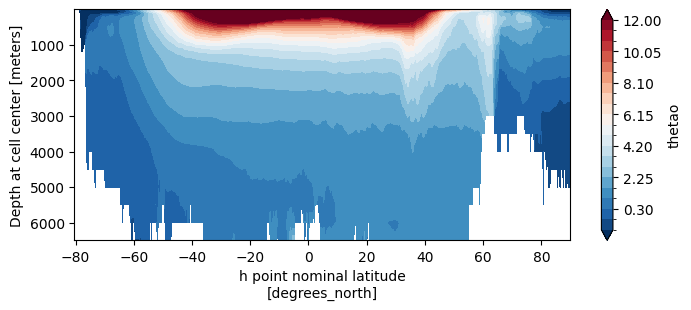

In [ ]:
plt.figure(figsize=(8,3))

(dsz_month_1.thetao.mean(['time','xh'])).plot.contourf(levels=np.linspace(-1, 12,21))
plt.gca().invert_yaxis()

In [35]:
plt.figure(figsize=(8,3))

(dsz_month_2.thetao.mean(['time','xh'])).plot.contourf(levels=np.linspace(-1, 12,21))
plt.gca().invert_yaxis()

: 